# Тестовое задание для Junior DS по разработке PD модели

(Sberseasons, осень 2022)

<b>Задание:</b> Необходиом разработать модель предсказания дефолта. Даны финансовые данные 32 395 компаний (выручка, активы, пассивы и т.д). Результат будет оцениваться на скрытой выборке из 200 компаний по метрике качества accuracy_score

<b>Цель задания</b> научиться / показать знания в разработке моделей оценки риска - probability of default. Задание приближено к реальному, данные синтетические. Лидерборд для оценки собственного решения и геймификации процесса обучения. Первое место в лидерборде не явлется целью. Цель - правильно разработанная модель, удовлетворяющая требованиям банковской системы. В случае возникновения вопросов, сотрудники блока Риски готовы проконсультировать и дать обратную связь на модель (телеграм чат).

<b>Метрика качества</b> accuracy_score вычисляется, как ( True positive + True negative ) / Total. Если сабмит-файл, не правильного формата или неверное количество строк, метрика будет = 0.

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['legend.frameon'] = True
palette = sns.color_palette('Set1')
sns.set_palette(palette)

In [106]:
!wget -q https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
!wget -q https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
!wget -q https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

In [107]:
train_df = pd.read_csv('PD-data-train.csv', sep=';')
test_df = pd.read_csv('PD-data-test.csv', sep=';')
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

Описание данных

In [108]:
desc_df.drop('desc_eng', axis=1, inplace=True)
desc_df

,field,desc_rus
0,ar_revenue,Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Общие расходы за последний год
2,ar_sale_cost,Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Валовая прибыль (на конец последнего года)
8,ar_taxes,Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Прочие доходы и расходы (на конец последнего г...


In [109]:
train_df, valid_df = train_test_split(train_df, stratify=train_df.default_12m, test_size=0.3, random_state=42)
train_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
2458,20572,8075000.0,3665000.0,3665000.0,0.0,0.0,4410000.0,212000.0,4622000.0,7000.0,...,4,4,4,[1-100],10000.0,1,0,0,0,0
7908,66273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,18,18,[1-100],10000.0,1,0,0,0,0
12394,104449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29,29,29,[1-100],10000.0,2,0,0,0,0
3232,27098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,24,24,[1-100],10000.0,1,0,0,0,0
3465,29044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,24,24,[1-100],10000.0,2,0,0,0,0


In [110]:
train_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
2458,20572,8075000.0,3665000.0,3665000.0,0.0,0.0,4410000.0,212000.0,4622000.0,7000.0,...,4,4,4,[1-100],10000.0,1,0,0,0,0
7908,66273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18,18,18,[1-100],10000.0,1,0,0,0,0
12394,104449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29,29,29,[1-100],10000.0,2,0,0,0,0
3232,27098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,24,24,[1-100],10000.0,1,0,0,0,0
3465,29044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,24,24,[1-100],10000.0,2,0,0,0,0


In [111]:
train_df.shape, valid_df.shape, test_df.shape

((22676, 37), (9719, 37), (200, 36))

Количество разных типов признаков.

In [112]:
train_df.dtypes.value_counts()

float64    25
int64      11
object      1
dtype: int64

In [113]:
train_df.drop('record_id', axis=1, inplace=True)
valid_df.drop('record_id', axis=1, inplace=True)

## Выбор метрики

Уровень дефолт-рейта в выборке.

In [114]:
train_df['default_12m'].values.mean()

0.06456165108484742

Видно, что выборка является сильно несбалансированной по таргету. Это значит, что использовать `accuracy` в качестве метрики качества классификации нельзя, потому что можно выбрать константный прогноз `y=0` и получить значение метрики свыше 0.9:

In [115]:
import numpy as np
y_train = train_df['default_12m']
y_pred = np.zeros(y_train.shape)
accuracy_score(y_train, y_pred) * 100

93.54383489151526

Вместо этого я предлагаю использовать [коэффициент Коэна](https://en.wikipedia.org/wiki/Cohen%27s_kappa) (каппа Коэна, Cohen's kappa), представляющий собой нормализованную `accuracy`:

$$\kappa = \frac{p_0 - p_e}{1 - p_e},$$

где $p_e$ здесь -- доля согласованных предсказаний, которая могла бы получиться при случайных ответах предсказателей, а $p_0$ -- доля верных ответов или доля согласованных предсказаний, или `accuracy`. Метрика выступает в качестве меры согласованности между двумя независимыми предсказателями.

Для категории $k$ и двух экспертов $n_{ki}$ определяется как число раз, когда эксперт $i$ предсказал категорию $k$, тогда:

$$p_e = \frac{1}{n^2}\sum\limits_{k} n_{1k} \cdot n_{2k},$$

$\kappa = 0$, когда $ROC-AUC = 0.5$, $\kappa = 1$ или $-1$ при полной согласованности и несогласованности соответственно.

Как будет оцениваться качество на тесте в лидерборде -- авторам виднее, но по-хорошему для таких задач использовать `accuracy` нельзя.

In [116]:
def ck_coeff(y: np.array, y_proba: np.array, treshold=0.5, mode='preds'):
    n = y.shape[0]
    if mode == 'proba':
        y_preds = (y_proba >= treshold).astype(int)
    elif mode == 'preds':
        y_preds = y_proba.copy()
    else:
        raise ValueError('Unknown mode')
        
    p0 = accuracy_score(y, y_preds)
    tmp0 = np.count_nonzero(y) * np.count_nonzero(y_preds)
    tmp1 = (n - np.count_nonzero(y)) * (n - np.count_nonzero(y_preds))
    pe = (tmp0 + tmp1) / n ** 2
    return (p0 - pe) / (1 - pe)

Также имеет смысл смотреть по `AUC-PR`: эта метрика хорошо себя показывает в задачах с дисбалансом классов. Можно сказать, что `AUC-PR` представляет собой матожидание `precision` по распределению, заданному выигрышем в `recall` при смене порога.

"The key difference is that ROC curves will be the same no matter what the baseline probability is, but PR curves may be more useful in practice for needle-in-haystack type problems or problems where the "positive" class is more interesting than the negative class". Это как раз наш случай. Иными словами, AUC-PR более точно отвечает на наш вопрос "What is the probability that this is a real hit given my classifier says it is?".

In [117]:
from sklearn.metrics import precision_recall_curve, auc

def auc_pr(y, y_proba):
    pr, rec, _ = precision_recall_curve(y, y_proba)
    return auc(rec, pr)

И, наконец, полезно будет смотреть и на коэффициент корреляции Мэтьюза, выражающийся в терминах матрицы ошибок следующим образом:

$$MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}$$

Аналогично, полная согласованность -- при значении 1 и абсолютная несогласованность при значении -1.

In [118]:
from sklearn.metrics import confusion_matrix

def matthews_corr_coeff(y, y_proba, treshold=0.5, mode='preds'):
    if mode == 'proba':
        y_preds = (y_proba >= treshold).astype(int)
    elif mode == 'preds':
        y_preds = y_proba.copy()
    else:
        raise ValueError('Unknown mode')
        
    TN, FP, FN, TP = confusion_matrix(y, y_preds).ravel()
    num = TP * TN - FP * FN
    denom = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
    if num == 0:
        return 0.0
    return num / np.sqrt(denom)

При мажоритарном предикте эти метрики равны:

In [119]:
ck_coeff(y_train, y_pred), matthews_corr_coeff(y_train, y_pred)

(0.0, 0.0)

## EDA

Посмотрим, сколько в выборке пропущенных значений.

In [120]:
train_df.isna().sum() / train_df.shape[0] * 100

ar_revenue                      47.080614
ar_total_expenses               47.080614
ar_sale_cost                    47.080614
ar_selling_expenses             47.080614
ar_management_expenses          47.080614
ar_sale_profit                  47.080614
ar_balance_of_rvns_and_expns    47.080614
ar_profit_before_tax            47.080614
ar_taxes                        47.080614
ar_other_profit_and_losses      47.080614
ar_net_profit                   47.080614
ab_immobilized_assets           47.080614
ab_mobile_current_assets        47.080614
ab_inventory                    47.080614
ab_accounts_receivable          47.080614
ab_other_current_assets         47.080614
ab_cash_and_securities          47.080614
ab_losses                       47.080614
ab_own_capital                  47.080614
ab_borrowed_capital             47.080614
ab_long_term_liabilities        47.080614
ab_short_term_borrowing         47.080614
ab_accounts_payable             47.080614
ab_other_borrowings             47

В большом числе признаков практически половина значений пропущена. Пока что здесь особых выводов не сделаешь, но это уже создает проблему с распределениями.

In [121]:
train_df.describe()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
count,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,...,22676.000000,22676.000000,22676.000000,22676.000000,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.0,22676.000000
mean,8.151788e+07,7.688116e+07,7.329775e+07,2.502492e+06,1.080921e+06,4.636722e+06,-6.211626e+05,4.015559e+06,4.146757e+05,3.851875e+04,...,78.422914,15.029591,15.029591,15.029591,1.250696e+06,12.019889,0.020771,0.000132,0.0,0.064562
std,1.279059e+08,1.234049e+08,1.161995e+08,1.225144e+07,7.871207e+06,1.863265e+07,6.023622e+06,1.864667e+07,1.575242e+06,4.132928e+05,...,46.519194,9.560907,9.560907,9.560907,1.110632e+07,86.818703,0.339999,0.011502,0.0,0.245756
min,0.000000e+00,-7.019840e+08,-5.072780e+08,-1.406100e+07,-1.921670e+08,-9.210000e+07,-7.581800e+07,-5.946600e+07,-1.681000e+07,-1.034000e+07,...,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.000000
25%,1.002150e+07,9.048500e+06,8.669000e+06,0.000000e+00,0.000000e+00,2.100000e+05,-9.452500e+05,1.430000e+05,0.000000e+00,0.000000e+00,...,34.000000,6.000000,6.000000,6.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
50%,3.220450e+07,2.956800e+07,2.832200e+07,0.000000e+00,0.000000e+00,1.238000e+06,-1.250000e+05,8.460000e+05,4.000000e+04,0.000000e+00,...,77.000000,14.000000,14.000000,14.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
75%,8.838300e+07,8.266200e+07,7.965200e+07,0.000000e+00,0.000000e+00,4.596500e+06,0.000000e+00,3.578250e+06,2.922500e+05,0.000000e+00,...,132.000000,24.000000,24.000000,24.000000,3.000000e+04,2.000000,0.000000,0.000000,0.0,0.000000
max,7.946840e+08,7.949360e+08,7.604440e+08,2.746560e+08,2.446380e+08,1.434511e+09,1.584250e+08,1.481526e+09,5.420200e+07,2.880900e+07,...,149.000000,33.000000,33.000000,33.000000,5.500000e+08,998.000000,20.000000,1.000000,0.0,1.000000


Есть признак, который имеет лишь одно уникальное значение.

In [122]:
_ = 'ul_systematizing_flg'
train_df[_].unique(), valid_df[_].unique(), test_df[_].unique()

(array([0]), array([0]), array([0]))

Также есть бинарный признак, доля положительных флагов в котором 0.0132% -- такой фактор вряд ли будет полезен с учетом дисбаланса таргета в 6.5%. Кроме того, если почистим выбросы, то с высокой долей вероятности даже в обучающей выборке не останется положительных флагов.

In [123]:
_ = 'ul_strategic_flg'
train_df[_].mean(), valid_df[_].mean(), test_df[_].mean()

(0.00013229846533780208, 0.0, 0.0)

Тем более, положительных значений в других выборках нет.

In [124]:
to_drop = ['ul_systematizing_flg', 'ul_strategic_flg']
train_df.drop(to_drop, axis=1, inplace=True)
valid_df.drop(to_drop, axis=1, inplace=True)
test_df.drop(to_drop, axis=1, inplace=True)

### Анализ непрерывных признаков

Цели данного раздела:
* Преобразования признаков
* Очистка выбросов
* Удаление плохих признаков
* Общий анализ распределений и мультиколлинеарности

In [125]:
floats = train_df.select_dtypes(include=float).columns
inds = desc_df[desc_df.field.isin(floats)].index
desc_floats = desc_df.loc[inds]
train_df[floats].describe()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,...,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,ul_capital_sum
count,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,...,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,1.200000e+04,2.267600e+04
mean,8.151788e+07,7.688116e+07,7.329775e+07,2.502492e+06,1.080921e+06,4.636722e+06,-6.211626e+05,4.015559e+06,4.146757e+05,3.851875e+04,...,8.181561e+05,1.507319e+06,3.254649e+06,1.889545e+07,2.413156e+07,3.288124e+06,4.984987e+06,1.497509e+07,8.833665e+05,1.250696e+06
std,1.279059e+08,1.234049e+08,1.161995e+08,1.225144e+07,7.871207e+06,1.863265e+07,6.023622e+06,1.864667e+07,1.575242e+06,4.132928e+05,...,7.903389e+06,4.448984e+06,8.748286e+06,4.361289e+07,5.955187e+07,3.190382e+07,1.376199e+07,3.481470e+07,1.109125e+07,1.110632e+07
min,0.000000e+00,-7.019840e+08,-5.072780e+08,-1.406100e+07,-1.921670e+08,-9.210000e+07,-7.581800e+07,-5.946600e+07,-1.681000e+07,-1.034000e+07,...,-3.413000e+06,0.000000e+00,-4.780300e+07,-7.501000e+07,0.000000e+00,-6.490000e+05,-2.700000e+06,0.000000e+00,-2.500000e+05,0.000000e+00
25%,1.002150e+07,9.048500e+06,8.669000e+06,0.000000e+00,0.000000e+00,2.100000e+05,-9.452500e+05,1.430000e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,3.900000e+04,9.300000e+04,4.640000e+05,1.597750e+06,0.000000e+00,0.000000e+00,6.407500e+05,0.000000e+00,1.000000e+04
50%,3.220450e+07,2.956800e+07,2.832200e+07,0.000000e+00,0.000000e+00,1.238000e+06,-1.250000e+05,8.460000e+05,4.000000e+04,0.000000e+00,...,0.000000e+00,2.605000e+05,6.640000e+05,3.594000e+06,7.245000e+06,0.000000e+00,3.630000e+05,3.613500e+06,0.000000e+00,1.000000e+04
75%,8.838300e+07,8.266200e+07,7.965200e+07,0.000000e+00,0.000000e+00,4.596500e+06,0.000000e+00,3.578250e+06,2.922500e+05,0.000000e+00,...,0.000000e+00,1.167250e+06,3.047000e+06,1.758200e+07,2.556050e+07,0.000000e+00,3.839250e+06,1.432200e+07,0.000000e+00,3.000000e+04
max,7.946840e+08,7.949360e+08,7.604440e+08,2.746560e+08,2.446380e+08,1.434511e+09,1.584250e+08,1.481526e+09,5.420200e+07,2.880900e+07,...,3.336220e+08,1.433060e+08,1.952910e+08,1.185962e+09,3.349389e+09,2.919676e+09,3.223740e+08,6.804430e+08,6.584520e+08,5.500000e+08


Сохраним минимальные значения всех признаков -- пригодится в будущем.

In [126]:
MIN_VALUES = {}
for key in floats:
    MIN_VALUES[key] = train_df[key].min()

#### Разумные преобразования

Для начала выведем распределения признаков as is.

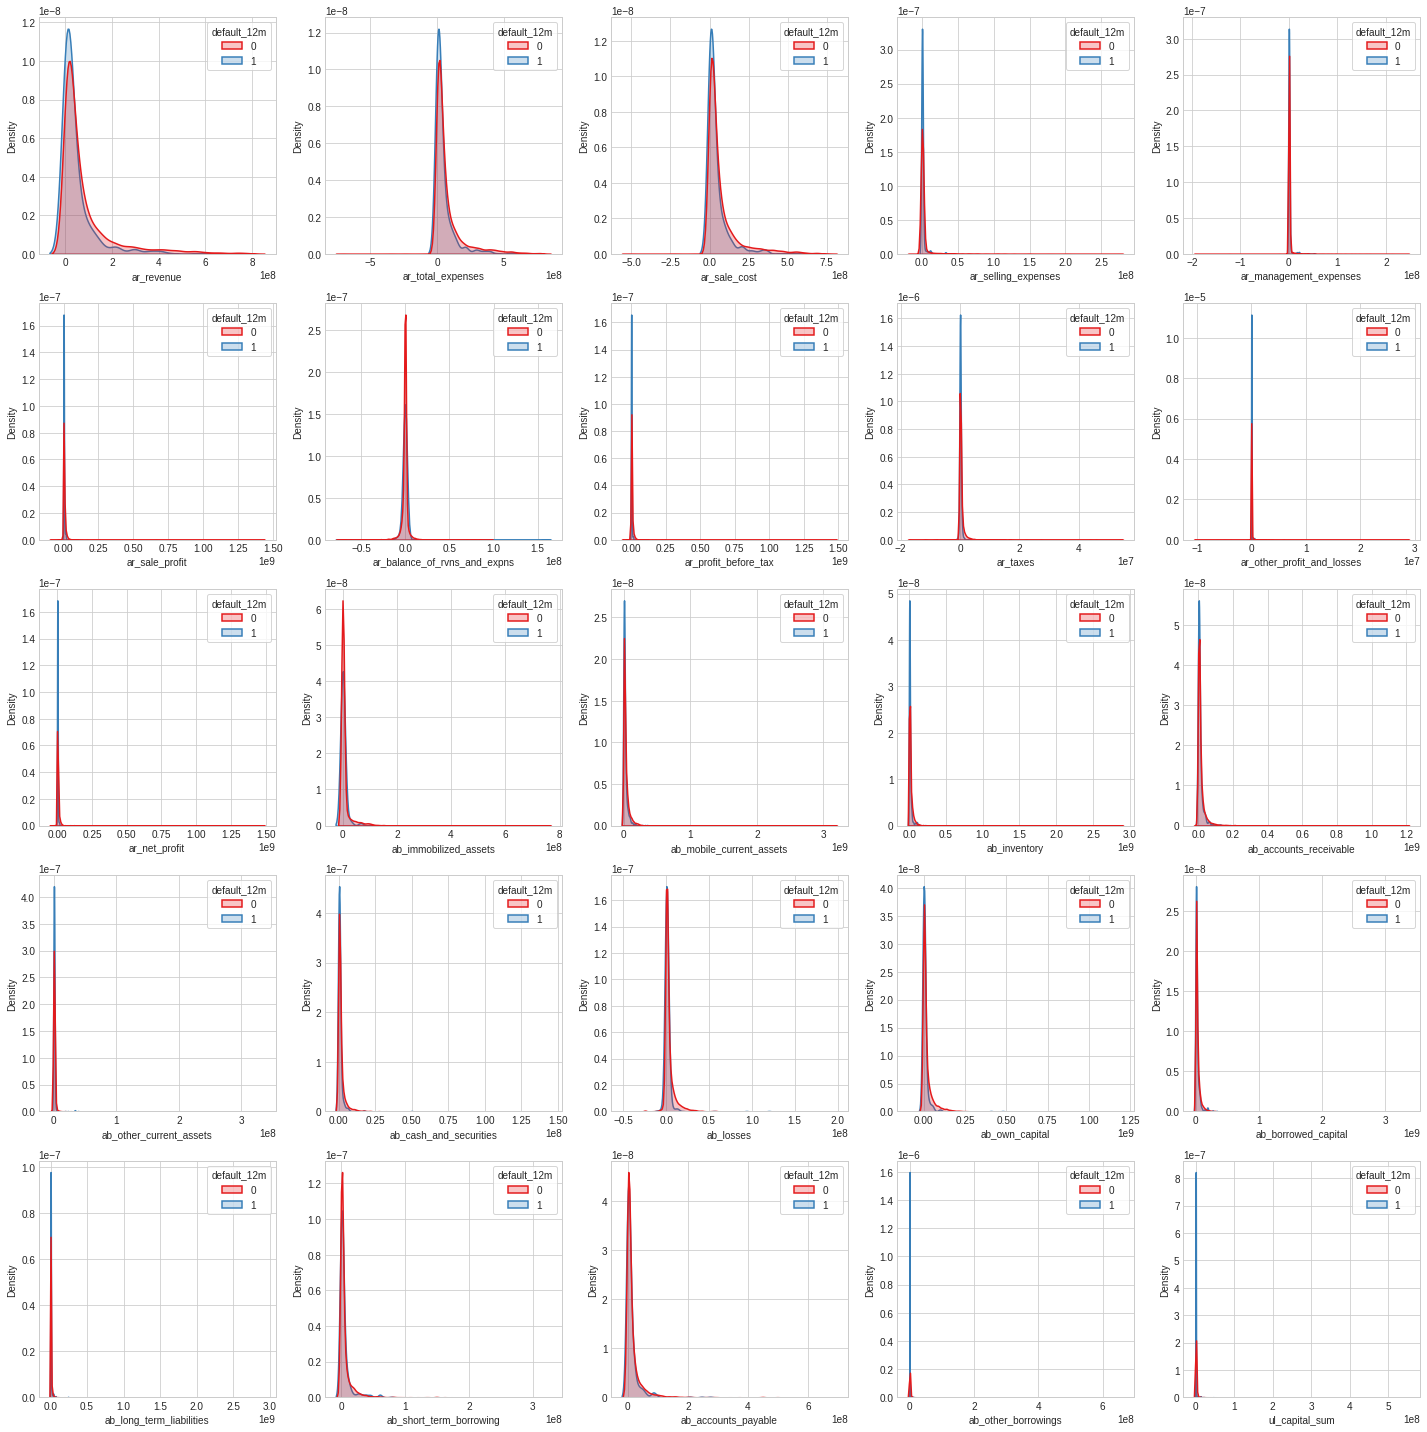

In [127]:
def plot_floats(train_df, features, nrows=5, ncols=5, figsize=(20, 20)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    for i, colname in enumerate(features):
        ax = axes[i // ncols][i % ncols]
        slice_df = train_df[~train_df[colname].isna()][colname]
        # ax.hist(slice_df, bins=70)
        y = train_df['default_12m'].loc[slice_df.index]
        sns.kdeplot(x=slice_df, hue=y, fill=True, linewidth=1.5, common_norm=False, ax=ax)
        ax.set_xlabel(colname)

    for i in range(1, nrows * ncols - len(features) + 1):
        axes.flat[-i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


plot_floats(train_df, floats)

Практически все распределения имеют тяжелые хвосты, а значит, могут быть и выбросы, или же значения, которые встречаются уж слишком часто (экстремально высокая мода). Тем не менее, сейчас рано чистить выбросы: в силу того, что у нас много пропущенных значений, мы можем потерять половину выборки.

Попробуем пологорифмировать распределения -- часто преобразование Бокса-Кокса (или нечто подобное) помогает в таких случаях. Логарифмируем каждый признак следующим образом:

$$x \longrightarrow \log \left(\frac{x + |min\ x| + 1}{|min\ x|} \right),\ min\ x < 0$$

$$x \longrightarrow \log(x + 1),\ min\ x \ge 0$$

Это сделано для того, чтобы моды этих признаков центрировались в нуле.

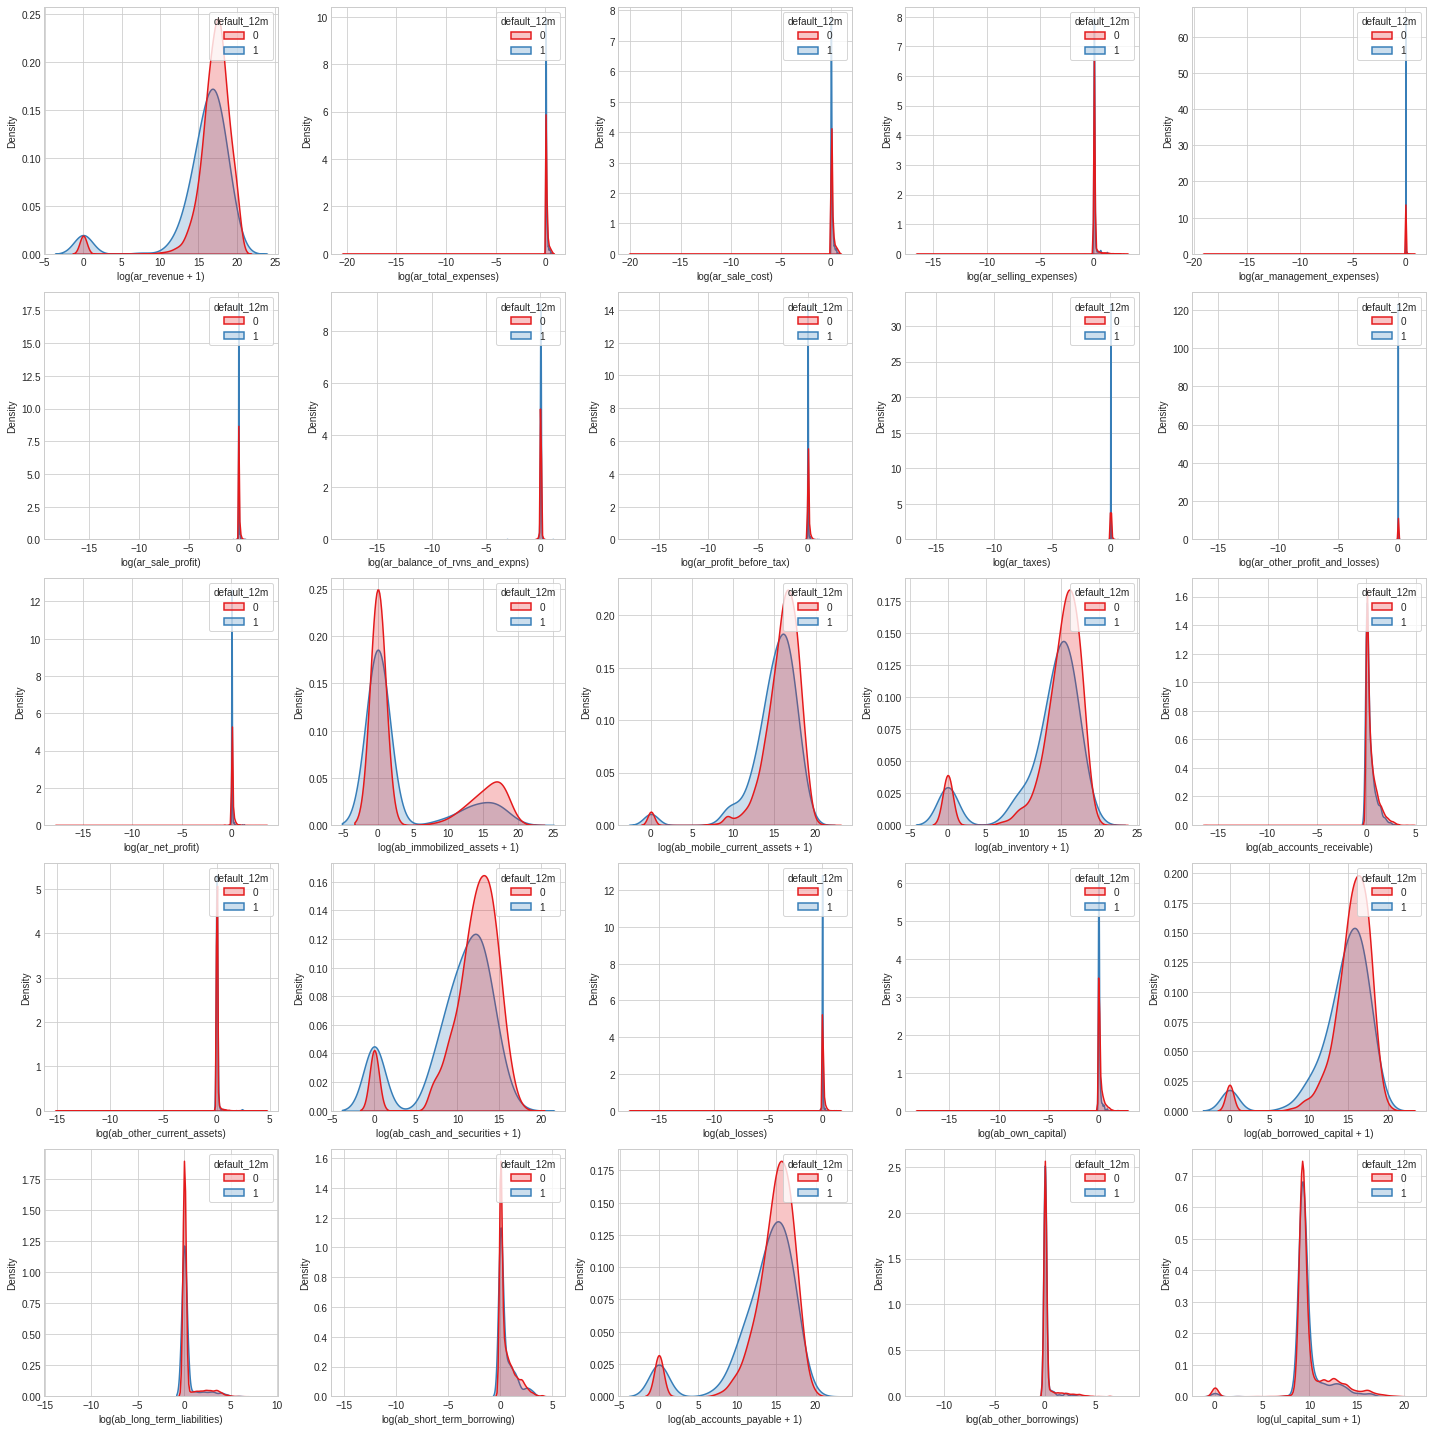

In [128]:
def plot_logged_floats(train_df, features, nrows=5, ncols=5, figsize=(20, 20), nz=False, min_val_view=True):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    for i, colname in enumerate(features):
        ax = axes[i // ncols][i % ncols]
        if nz:
            slice_df = train_df[train_df[colname] != 0.0][colname]
        else:
            slice_df = train_df[colname]

        y = train_df['default_12m'].loc[slice_df.index]
        min_val = MIN_VALUES[colname]
        if min_val < 0.0:
            abs_min = np.abs(min_val)
            slice_df = np.log((slice_df + abs_min + 1) / abs_min)
            ax.set_xlabel(f'log({colname})')
        else:
            slice_df = np.log1p(slice_df)
            ax.set_xlabel(f'log({colname} + 1)')
        sns.kdeplot(x=slice_df, hue=y, fill=True, linewidth=1.5, common_norm=False, ax=ax)

    for i in range(1, nrows * ncols - len(features) + 1):
        axes.flat[-i].set_visible(False)

    plt.tight_layout()
    plt.show()


plot_logged_floats(train_df, floats)

Есть некоторые разумные признаки, однако практически во всех есть нулевой столбец. Имеет смысл заполнить пропущенные значения также нулем как значением, которое индентифицирует отсутствие информации. Это вполне разумно: в задачах кредитного скоринга, дефолта или оттока нередка ситуация, когда нет информации по той или иной статистике.

Также можно заметить, что в некоторых признаках значение моды соответствует положительному классу.

Выведем моды этих признаков.

In [129]:
for colname in floats:
    print(f'{colname}:\n\tmode | missing: {train_df[colname].mode()[0]} | {train_df[colname].isna().sum()}')

ar_revenue:
	mode | missing: 0.0 | 10676
ar_total_expenses:
	mode | missing: 0.0 | 10676
ar_sale_cost:
	mode | missing: 0.0 | 10676
ar_selling_expenses:
	mode | missing: 0.0 | 10676
ar_management_expenses:
	mode | missing: 0.0 | 10676
ar_sale_profit:
	mode | missing: 0.0 | 10676
ar_balance_of_rvns_and_expns:
	mode | missing: 0.0 | 10676
ar_profit_before_tax:
	mode | missing: 0.0 | 10676
ar_taxes:
	mode | missing: 0.0 | 10676
ar_other_profit_and_losses:
	mode | missing: 0.0 | 10676
ar_net_profit:
	mode | missing: 0.0 | 10676
ab_immobilized_assets:
	mode | missing: 0.0 | 10676
ab_mobile_current_assets:
	mode | missing: 0.0 | 10676
ab_inventory:
	mode | missing: 0.0 | 10676
ab_accounts_receivable:
	mode | missing: 0.0 | 10676
ab_other_current_assets:
	mode | missing: 0.0 | 10676
ab_cash_and_securities:
	mode | missing: 0.0 | 10676
ab_losses:
	mode | missing: 0.0 | 10676
ab_own_capital:
	mode | missing: 10000.0 | 10676
ab_borrowed_capital:
	mode | missing: 0.0 | 10676
ab_long_term_liabilit

Действительно: только у двух из этих признаков мода отлична от нуля.

#### Заполнение пропусков и очистка выбросов

Заполним пропуски модой. Тогда, скорее всего, мы получим картину с бимодальными распределениями для некоторых признаков, однако более адекватного варианта я предложить не могу: картина будет хуже, если заполнить, например, среднем, хоть и в этом случае некоторые признаки будут выглядеть лучше.

In [130]:
from sklearn.impute import SimpleImputer
train_df[floats] = SimpleImputer(strategy='most_frequent').fit_transform(train_df[floats])

Здесь же уже можно почистить выбросы. Для этого ограничим значения признаков 2% и 98% квантилями.

In [131]:
quantiles = {}
tmp_df = train_df.copy()
for colname in floats:
    quantiles[colname] = (tmp_df[colname].quantile(0.98), tmp_df[colname].quantile(0.02))

for colname in floats:
    q_98, q_2 = quantiles[colname]
    tmp_df = tmp_df[tmp_df[colname] <= q_98]
    tmp_df = tmp_df[tmp_df[colname] >= q_2]

train_df.shape[0], tmp_df.shape[0]

(22676, 18708)

Выкинули не так уж и много объектов. Посмотрим, насколько изменилась доля объектов положительного таргета:

In [132]:
train_df.default_12m.mean(), tmp_df.default_12m.mean()

(0.06456165108484742, 0.07205473594184306)

Доля объектов положительного класса выросла, что на мой взгляд хорошо.

In [133]:
train_df = tmp_df.copy()

#### Взгляд на преобразования

Вернемся к распределениям.

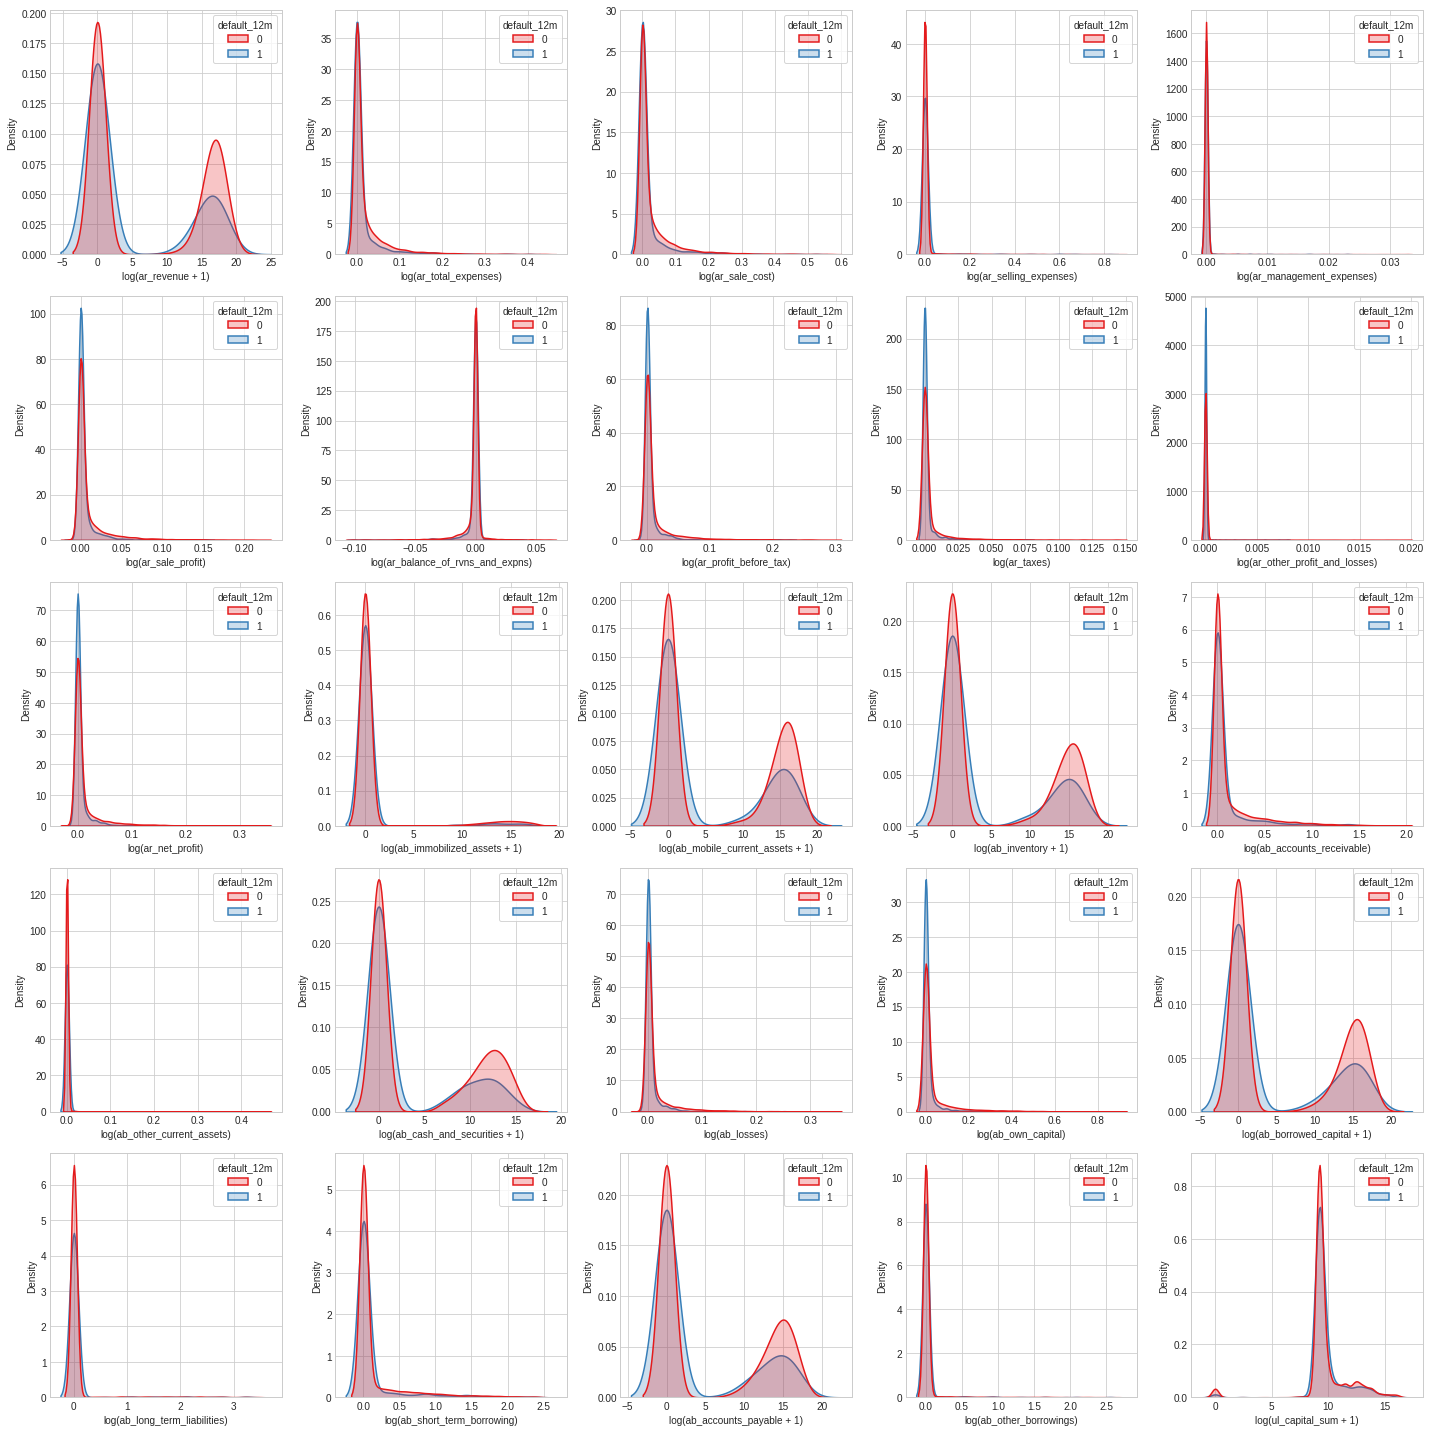

In [134]:
plot_logged_floats(train_df, floats)

Как я и сказал, появилась бимодальность в некоторых признаках. В целом, несмотря на визуализацию, новые моды -- это нули, и по сути можно это дело игнорировать.

Выведем распределения без нулевых значений.

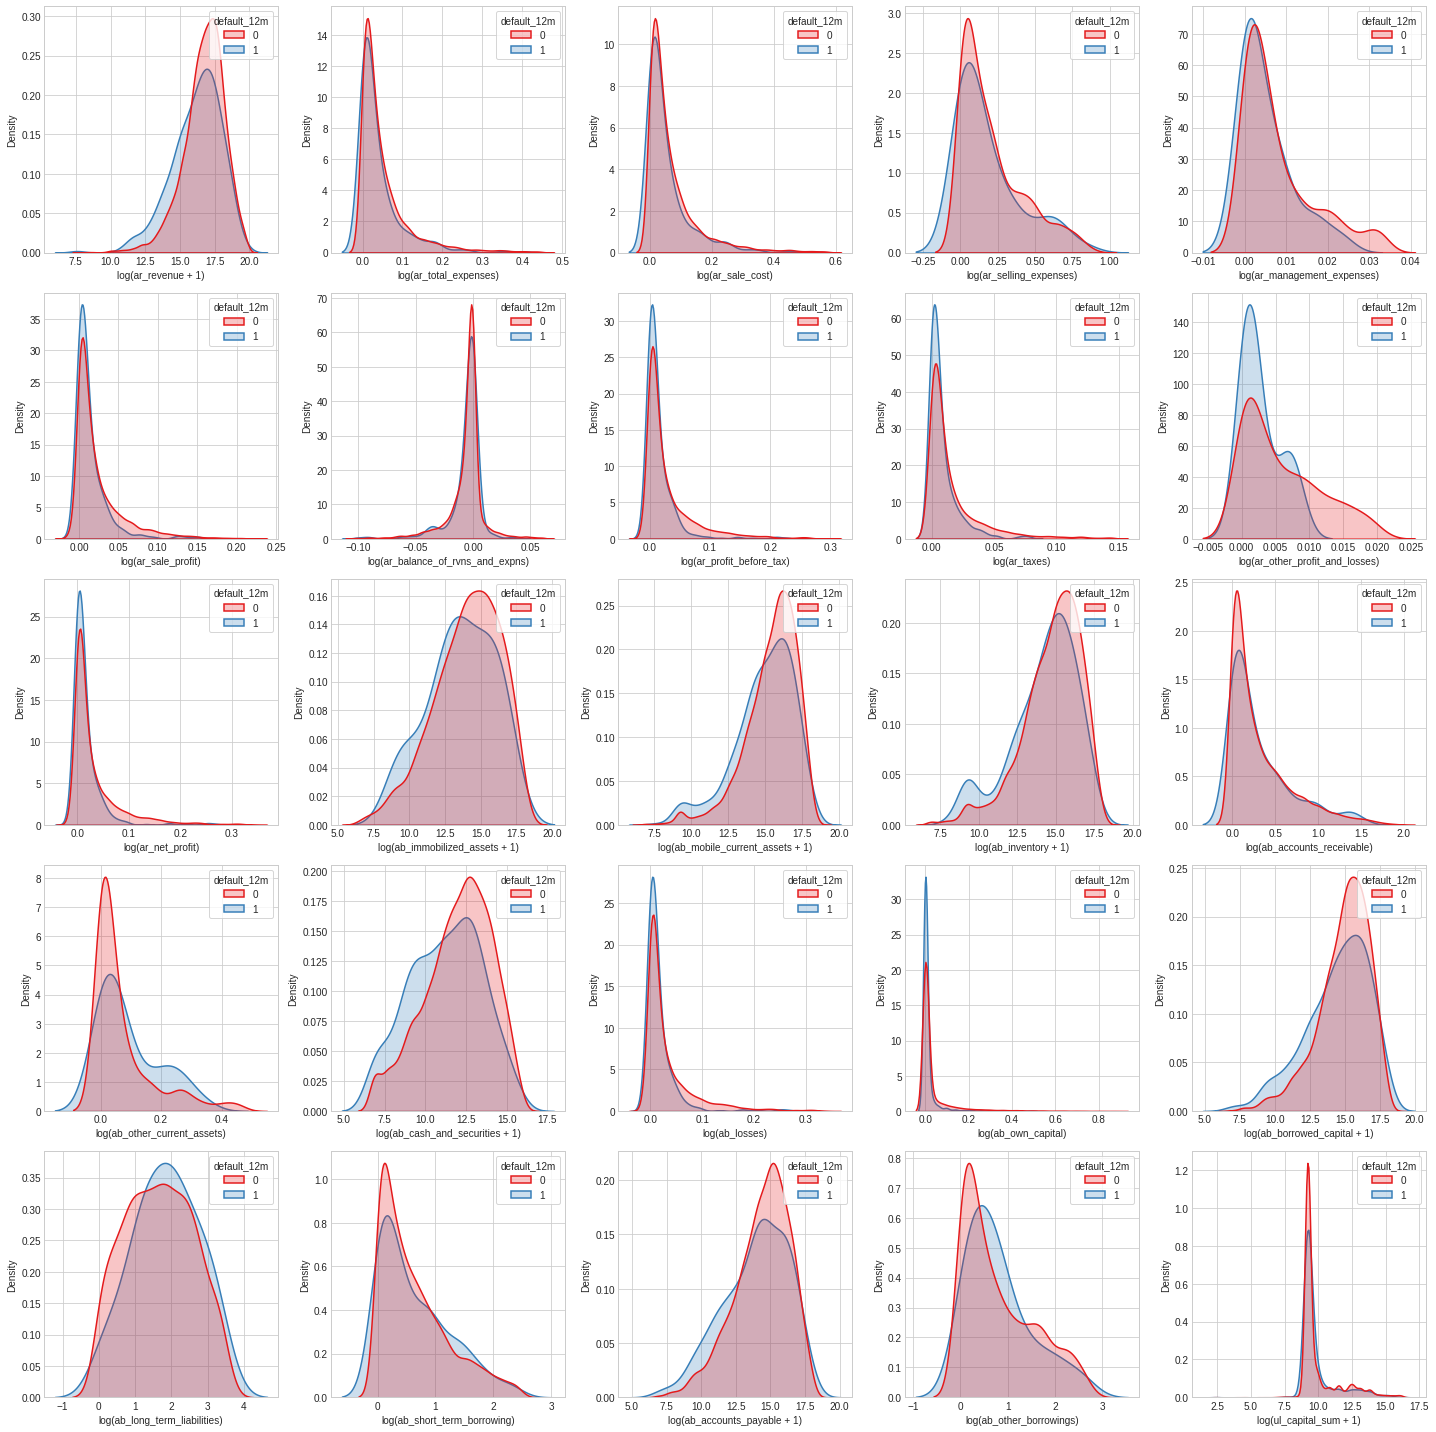

In [135]:
plot_logged_floats(train_df, floats, nz=True)

Видно, что очистка выбросов сильно помогла: у нас появилось больше признаков, которые имеют более-менее адекватное распределение.

Здесь на самом деле есть проблема в том, что некоторые признаки теперь имеют минимальное значение 0, и если их логарифмировать через $\log(x + 1)$, то мы получим весьма неплохие распределения, носитель которых исходит от нуля. Однако здесь нужно делать поправку на то, что преобразование $\log(x + 1)$ сильно меняет распределения, и его же не получится применить на очищенных данных. Так что делаем преобразование как раньше, но только минимум для каждого распределение сохранен еще до очистки.

In [136]:
to_log_features = ['ar_revenue', 'ar_total_expenses', 'ar_sale_cost', 'ar_selling_expenses', 'ar_management_expenses',
                   'ar_other_profit_and_losses',
                   'ab_immobilized_assets', 'ab_mobile_current_assets', 'ab_inventory', 'ab_accounts_receivable',
                   'ab_other_current_assets', 'ab_cash_and_securities', 'ab_borrowed_capital',
                   'ab_long_term_liabilities', 'ab_short_term_borrowing', 'ab_accounts_payable', 'ab_other_borrowings']

In [137]:
train_df[to_log_features].describe()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_other_profit_and_losses,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings
count,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,18708.000000,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04,1.870800e+04
mean,1.683160e+07,1.591234e+07,1.573323e+07,1.499292e+05,2.918793e+04,701.518067,5.342909e+05,5.266849e+06,3.041984e+06,2.217746e+06,7.119147e+03,2.680798e+05,3.695854e+06,2.120017e+05,8.526944e+05,2.604069e+06,2.708900e+04
std,4.041976e+07,3.925428e+07,3.904724e+07,1.117815e+06,3.119685e+05,9008.721791,3.765419e+06,1.163268e+07,7.621985e+06,6.149999e+06,8.019102e+04,8.091781e+05,9.090245e+06,1.414855e+06,2.926198e+06,7.311526e+06,2.034834e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.491325e+07,1.345900e+07,1.314450e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.506250e+06,1.783000e+06,1.043000e+06,0.000000e+00,9.400000e+04,2.536500e+06,0.000000e+00,0.000000e+00,1.221000e+06,0.000000e+00
max,4.016150e+08,3.943170e+08,3.923830e+08,1.970100e+07,6.426000e+06,206000.000000,6.756100e+07,1.177680e+08,8.048400e+07,6.920000e+07,1.993000e+06,8.239000e+06,1.028680e+08,2.144400e+07,2.928700e+07,7.771200e+07,3.402000e+06


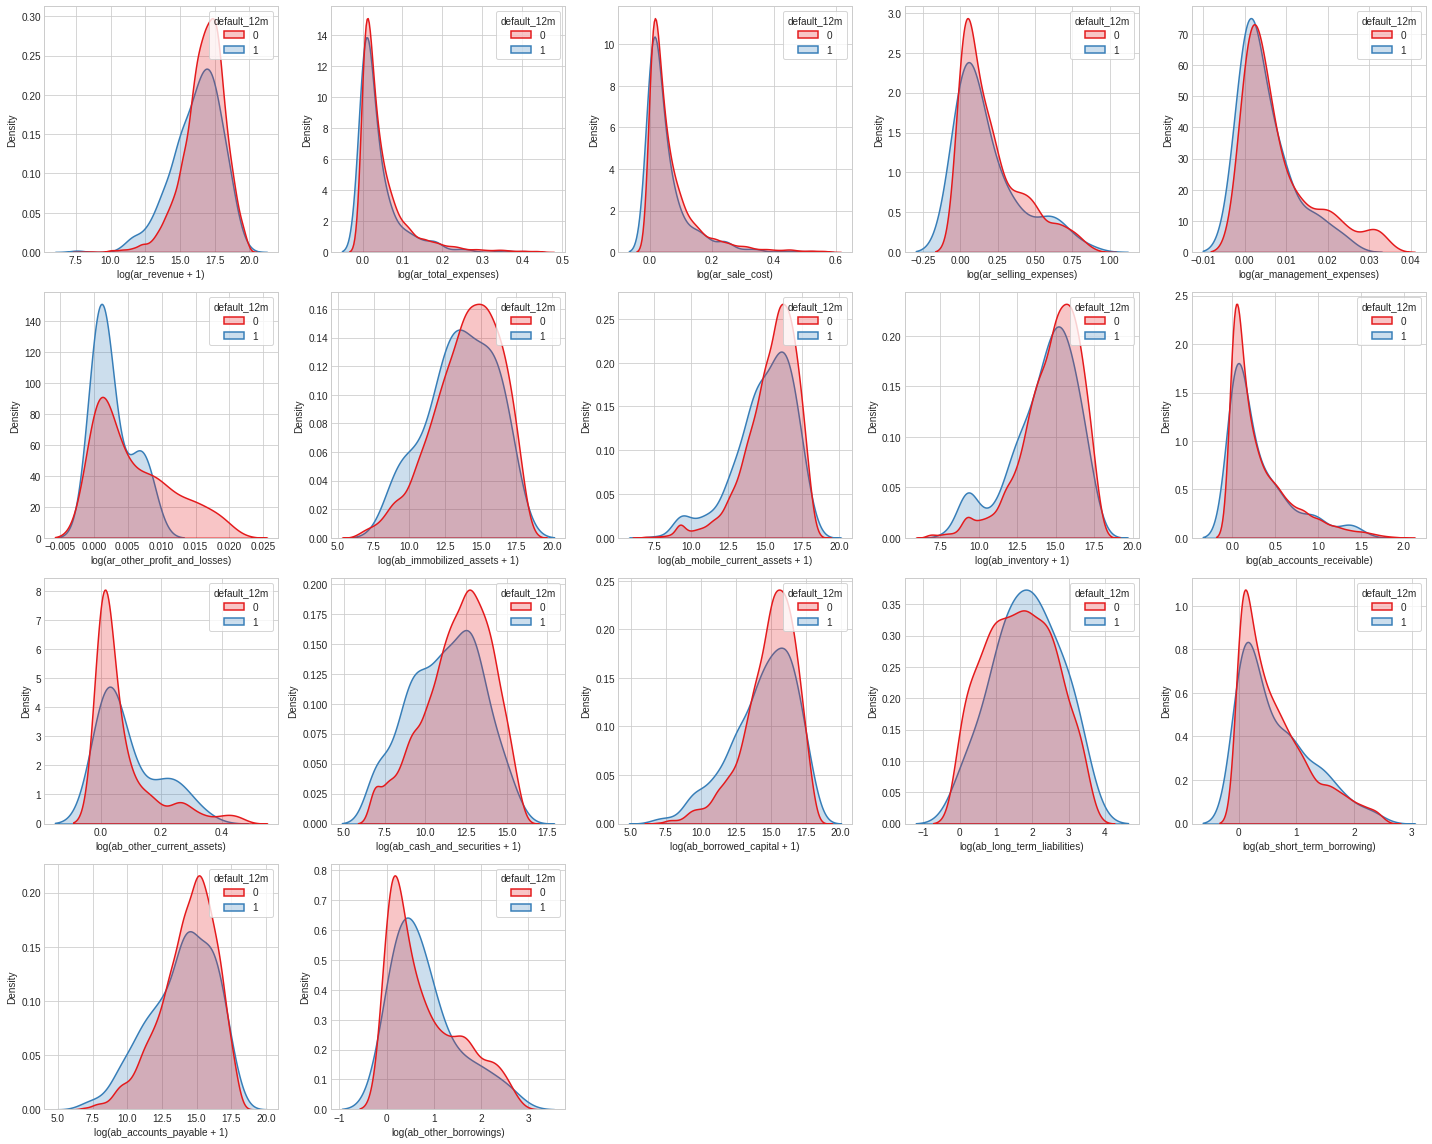

In [138]:
plot_logged_floats(train_df, to_log_features, nrows=4, ncols=5, figsize=(20, 16), nz=True)

Можно выделить уж совсем плохие признаки, которые не влияют на таргет.

In [139]:
bad_features = {'ar_total_expenses', 'ar_sale_cost'}

#### Исследование мультиколлинеарности

Кроме того, здесь в некоторых признаках возможна мультиколлинеарность, так как распределения некоторых признаков уж очень сильно похожи. Можно посмотреть на корреляции.

In [140]:
def plot_heatmap(df, method='Spearman', _type='', triangle=True, colormap='inferno', figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.title('{} Correlation of {} Features'.format(method, _type), y=1.05, size=18)
    corrs = df.corr(method=method.lower())
    
    mask = np.triu(np.ones_like(corrs, dtype=bool)) if triangle else None
    
    sns.heatmap(corrs, mask=mask,
                linewidths=0.1, vmax=1.0, fmt='.2f',
                square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()

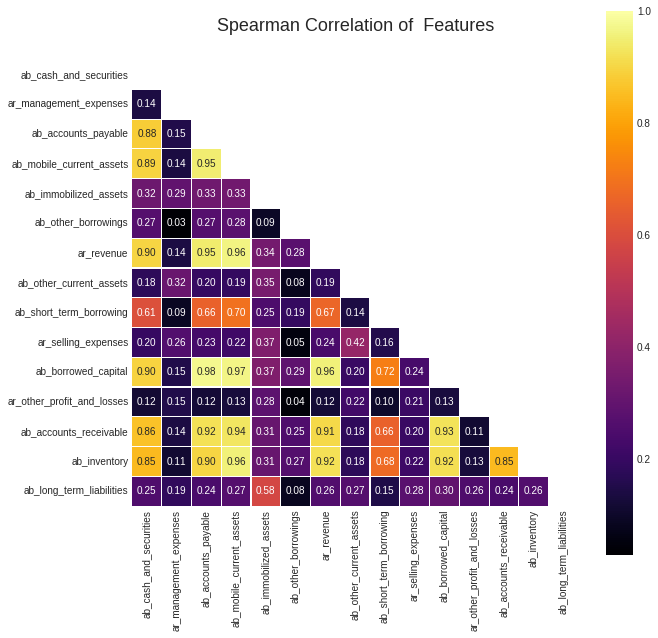

In [141]:
to_corr = list(set(to_log_features) - bad_features)

tmp_df = train_df.copy()
for feature in to_corr:
    min_val = MIN_VALUES[feature]
    if min_val < 0.0:
        abs_min = np.abs(min_val)
        tmp_df[feature] = np.log((tmp_df[feature] + abs_min + 1) / abs_min)
    else:
        tmp_df[feature] = np.log1p(tmp_df[feature])    
        
plot_heatmap(tmp_df[to_corr])

In [142]:
def get_most_corred(df, corr_val=0.9):
    c = df.corr(method='spearman')
    c.values[np.tril_indices_from(c)] = np.nan
    c_np = c.to_numpy()

    most_corred = [(c.index[i], c.columns[j], c_np[i, j])
                       for i, j in np.argwhere(c_np > corr_val)]
    return most_corred

In [143]:
most_corred = get_most_corred(tmp_df[to_corr], 0.8)

Исследуем показатель `VIF`:

$$VIF_j = \frac{1}{1 - R_j^2},$$
где $R_j^2$ -- коэффициент детерминации фактора (регрессора) на другие факторы. Если показатель высок, то имеется мультиколлинеарность относительно регрессора $j$.

Несмотря на задачу бинарный классификации, в этом случае регрессионный анализ уместен (комментарий моего лектора по прикладной статистике). Иными словами, для определения мультиколлинеарности можно рассматривать задачу бинарной классификации как задачу регрессии.

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [145]:
def get_vifs(df, most_corred):
    to_ols = set()
    for elem in most_corred:
        to_ols |= {elem[0], elem[1]}

    df_ols = df[to_ols]
    X = add_constant(df_ols)

    vifs = {}
    for i in range(df_ols.shape[1]):
        vifs[df_ols.columns[i]] = vif(X.values, i)
    return vifs


def validate_features(vifs, vif_treshold=300):
    bad_features = set()
    for key in vifs:
        if vifs[key] > vif_treshold:
            bad_features |= set([key])
    return bad_features

In [146]:
vifs = get_vifs(tmp_df, most_corred)
vifs

{'ar_revenue': 1.7352771053294243,
 'ab_cash_and_securities': 24.873252716682476,
 'ab_borrowed_capital': 7.043825634837779,
 'ab_accounts_receivable': 43.366282474818796,
 'ab_accounts_payable': 1.6508535615034616,
 'ab_inventory': 24.352405782754136,
 'ab_mobile_current_assets': 11.040756770428006}

Есть комментарий из официальной документации:
- One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

Таким образом, показатель свыше 5 уже может говорить о наличии мультиколлинеарности относительно регрессора. Возьмем порог в 10.

In [147]:
bad_features |= validate_features(vifs, 10)
bad_features

{'ab_accounts_receivable',
 'ab_cash_and_securities',
 'ab_inventory',
 'ab_mobile_current_assets',
 'ar_sale_cost',
 'ar_total_expenses'}

In [148]:
other_features = list(set(floats) - set(to_log_features))
to_log_features = list(set(to_log_features) - bad_features)

#### Взгляд на преобразования 2

Остались некоторые другие непрерывные признаки.

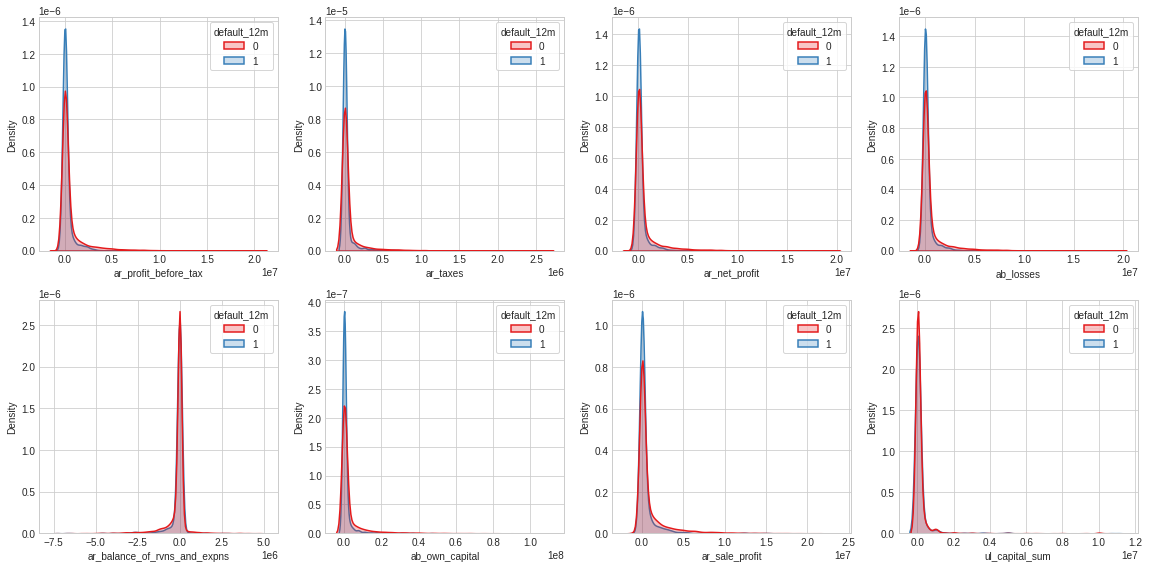

In [149]:
plot_floats(train_df, other_features, nrows=2, ncols=4, figsize=(16, 8))

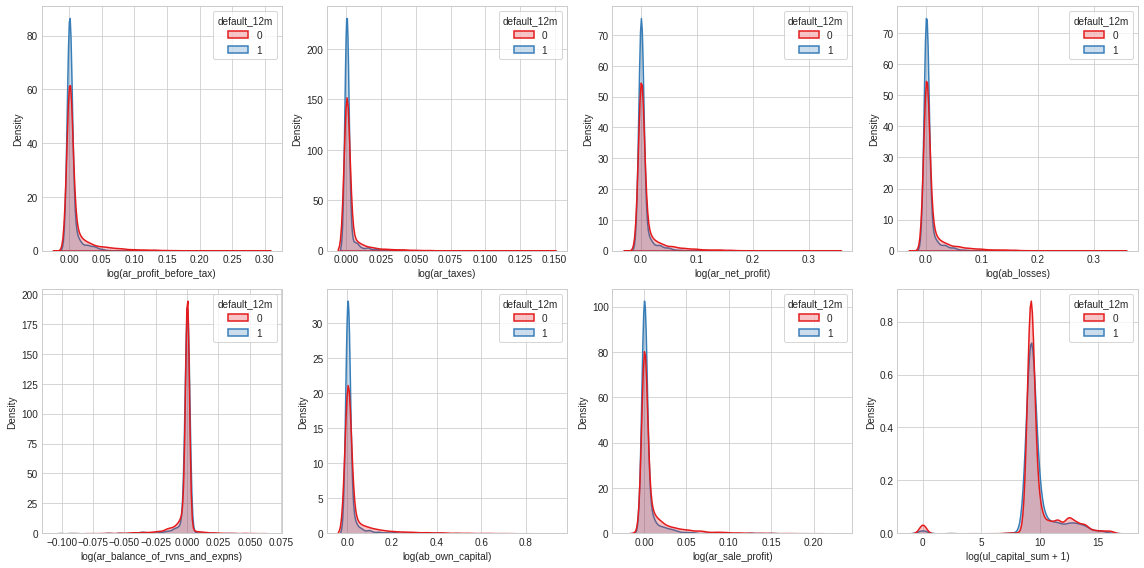

In [150]:
plot_logged_floats(train_df, other_features, nrows=2, ncols=4, figsize=(16, 8), nz=False)

Видно, что здесь логарифмирование никак, собственно, и не помогло. Какие-то значимые изменения -- только у `ul_capital_sum`. У остальных по чистому совпадению даже шкала не изменилась (кроме порядка): просто засчет удаления выбросов оригинальные распределения стали не такими дикими.

В целом, логарифмирование можно оставить, чтобы не делать уже потом скейлинг с большими значениями -- не думаю, что это как-то навредит.

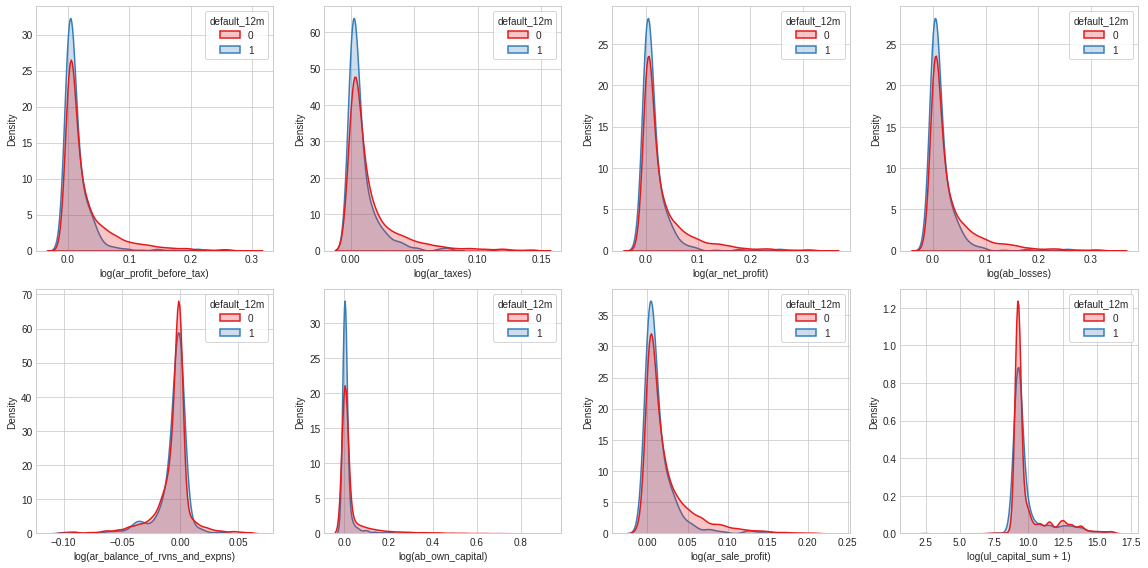

In [151]:
# Без нулей
plot_logged_floats(train_df, other_features, nrows=2, ncols=4, figsize=(16, 8), nz=True)

Некоторые распределения также похожи. Снова отберем признаки с высоким `VIF`.

In [152]:
most_corred = get_most_corred(tmp_df[other_features], 0.8)
vifs = get_vifs(tmp_df, most_corred)
vifs

{'ar_profit_before_tax': 1.1871456149915853,
 'ab_own_capital': 105.33550209069638,
 'ar_net_profit': 1.822835607567025,
 'ar_sale_profit': 2307.0065348232524,
 'ab_losses': 9.221358399346009}

In [153]:
other_features = list(set(other_features) - validate_features(vifs, 10))

In [154]:
FEATURES = {
    'to_log': to_log_features,
    'other': other_features,
    'bad': set(floats) - set(to_log_features) - set(other_features),
}

In [155]:
train_df[to_log_features] = tmp_df[to_log_features]

Таким образом, было удалено признаков:

In [156]:
len(FEATURES['bad'])

8

In [157]:
# Удалили в самом начале
FEATURES['bad'] |= set(['ul_systematizing_flg'])

### Анализ категориальных признаков

Пока что были рассмотрены только непрерывные признаки. Остальные признаки разобьем по категориям -- числовые дискретные (или порядковые) и категориальные, проведем анализ и попробуем сгенерировать новые признаки.

In [158]:
cats = train_df.select_dtypes(exclude=float).columns[:-1]
cats, len(cats)

(Index(['bus_age', 'ogrn_age', 'adr_actual_age', 'head_actual_age',
        'cap_actual_age', 'ul_staff_range', 'ul_founders_cnt', 'ul_branch_cnt'],
       dtype='object'), 8)

Большинство этих признаков -- целочисленные. Выведем показатели.

In [159]:
train_df[cats].describe()

,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_founders_cnt,ul_branch_cnt
count,18708.000000,18708.000000,18708.000000,18708.000000,18708.000000,18708.000000,18708.000000
mean,87.961835,73.344665,15.117383,15.117383,15.117383,6.540999,0.011172
std,71.804527,46.108531,9.485042,9.485042,9.485042,61.733317,0.231282
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,31.000000,30.000000,6.000000,6.000000,6.000000,1.000000,0.000000
50%,69.000000,68.000000,14.000000,14.000000,14.000000,1.000000,0.000000
75%,124.000000,120.000000,24.000000,24.000000,24.000000,2.000000,0.000000
max,921.000000,149.000000,33.000000,33.000000,33.000000,998.000000,12.000000


И описания этих признаков.

In [160]:
inds = desc_df[desc_df.field.isin(cats)].index
desc_cats = desc_df.loc[inds]
desc_cats['nunique'] = train_df[cats].nunique().to_numpy()
desc_cats

,field,desc_rus,nunique
24,bus_age,Срок ведения бизнеса,308
25,ogrn_age,Срок с момента присваивания ОГРН,150
26,adr_actual_age,Срок с момента регистрации юридического адреса,33
27,head_actual_age,Срок с момента назначения руководителя,33
28,cap_actual_age,Срок с момента установки капитала,33
29,ul_staff_range,Количество сотрудников,3
31,ul_founders_cnt,Количество акционеров,129
32,ul_branch_cnt,Количество филиалов,11


Здесь, в целом, все признаки дискретные количественные, но количество сотрудников -- ранговый.

In [161]:
numeric = ['bus_age', 'ogrn_age', 'adr_actual_age', 'head_actual_age',
           'cap_actual_age', 'ul_founders_cnt', 'ul_branch_cnt']
rank = ['ul_staff_range']

In [162]:
train_df['ul_staff_range'].unique()

array(['[1-100]', '(100-500]', '> 500'], dtype=object)

#### Анализ распределений

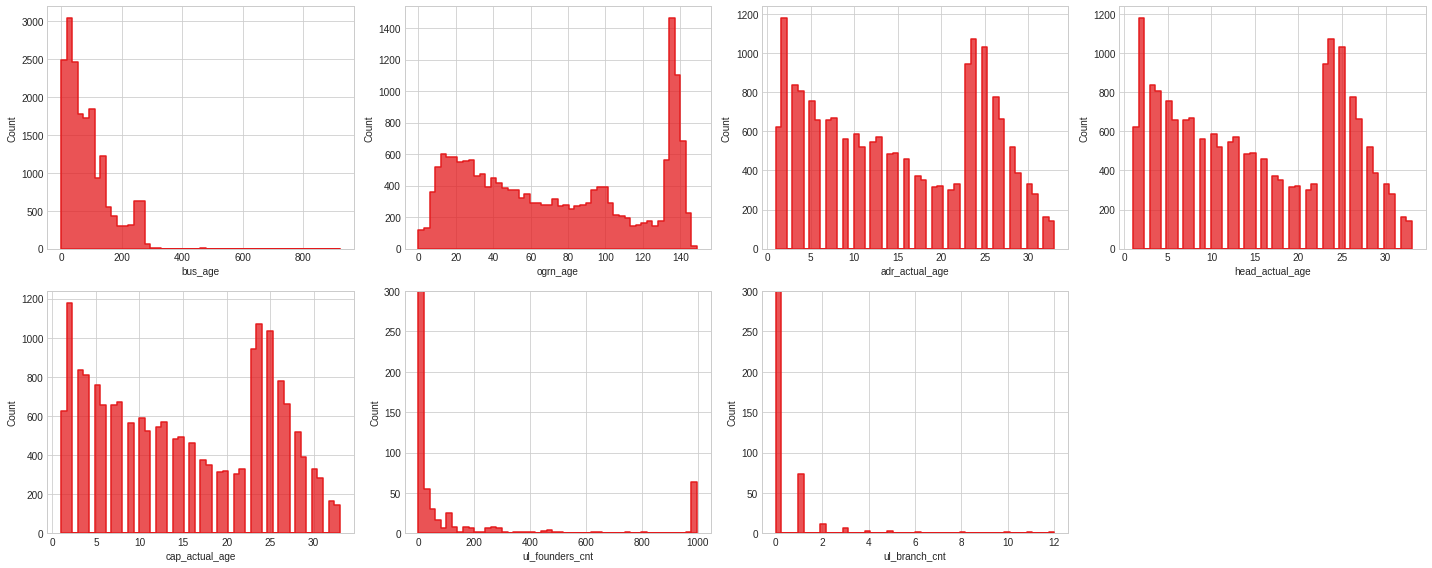

In [163]:
def plot_ints(train_df, features, nrows=2, ncols=4, ylim=300, figsize=(20, 8), **kwargs):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    for i, colname in enumerate(features):
        ax = axes[i // ncols][i % ncols]
        sns.histplot(data=train_df, x=colname, element='step', linewidth=1.5, **kwargs, ax=ax)
        ax.set_xlabel(f'{colname}')
        if i in [5, 6]:
            ax.set_ylim([0, ylim])

    for i in range(1, nrows * ncols - len(features) + 1):
        axes.flat[-i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


plot_ints(train_df, numeric, bins=50)

Во-первых, признаки вида `***_actual_age` имеют практически одинаковое распределение -- имеет место проблема мультиколлинеарности, поэтому стоит снова исследовать `VIF`. Во-вторых, из этой картины уже можно выделить несколько новых признаков по биннингу (разделить ноститель на отрезки). 

Так, например, в признаках `***_actual_age` можно выделить два отрезка. Например, значение `***_actual_age=22` разграничивает две тенденции. Если смотреть на все это в общем, то можно вывести два довольно значимых признака-индикатора: старая ли компания, крупная ли компания. Надо лишь понять, как правильно это сделать.

В теории эти признаки могут оказаться важными, потому что у разных по зрелости компаний бизнес-процессы могут быть совершенно по-разному устроены, что естественным образом сказывается на экономических показателях организаций, которые уже сами по себе могут значительно влиять на дефолт.

Исходя из этого можно вывести более сложный признак с помощью биннинга: ввести уровни, как это сделано с числом сотрудников.

Посмотрим на `VIF`.

In [164]:
to_corr = ['adr_actual_age', 'head_actual_age', 'cap_actual_age']
most_corred = get_most_corred(tmp_df[to_corr], 0.8)
most_corred

[('adr_actual_age', 'head_actual_age', 1.0),
 ('adr_actual_age', 'cap_actual_age', 1.0),
 ('head_actual_age', 'cap_actual_age', 1.0)]

In [165]:
vifs = get_vifs(tmp_df, most_corred)
vifs

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


{'head_actual_age': 3.5403757803603044,
 'adr_actual_age': inf,
 'cap_actual_age': inf}

Корреляция везде 1, `VIF` улетает в бесконечность при коэффициенте детерминации равном 1, что говорит о том, что дисперсия зависимого регрессора объясняется полностью другим регрессором. То есть, есть полная зависимость между объясняемым регрессором от всех других.

Иными словами, определенно нужно избавляться от признаков.

In [166]:
numeric = ['bus_age', 'ogrn_age', 'cap_actual_age', 'ul_founders_cnt', 'ul_branch_cnt']
FEATURES['bad'] |= set(['adr_actual_age', 'head_actual_age'])

Посмотрим теперь, как оставшиеся признаки связаны с таргетом. 

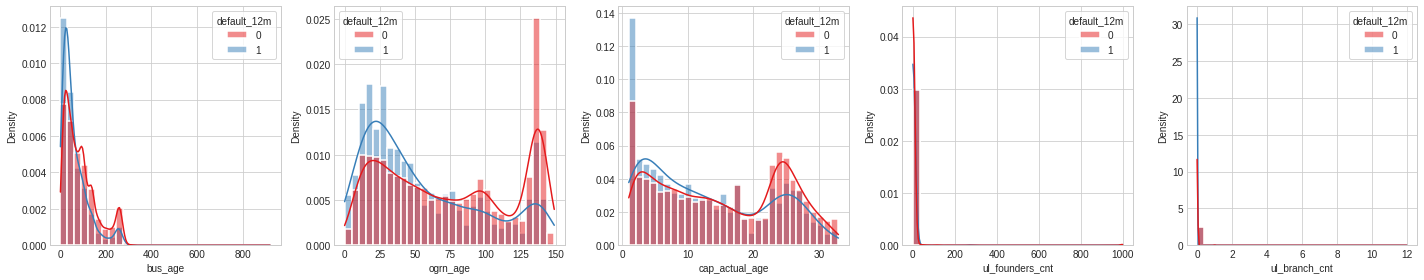

In [167]:
def plot_ints_hue(train_df, features, nrows=2, ncols=4, figsize=(20, 4)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    for i, colname in enumerate(features):
        ax = axes[i // ncols][i % ncols]
        sns.histplot(data=train_df, x=colname, hue='default_12m', bins=30, 
                     stat='density', kde=True, element='bars', linewidth=1.5, common_norm=False, ax=ax)
        ax.set_xlabel(f'{colname}')

    for i in range(1, nrows * ncols - len(features) + 1):
        axes.flat[-i].set_visible(False)
    
    plt.tight_layout()
    plt.show()


plot_ints_hue(train_df, numeric, nrows=1, ncols=5)

Есть что-то полезное. Попробуем логарифмировать два последних.

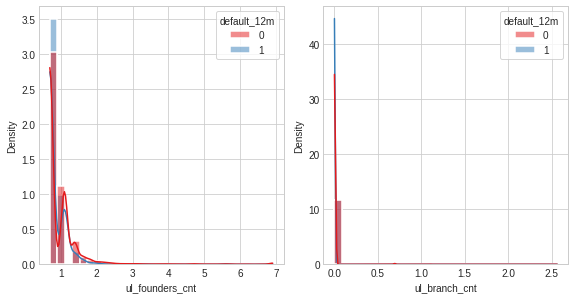

In [168]:
tmp_df_ = train_df[numeric[-2:] + ['default_12m']].copy()
tmp_df_[numeric[-2:]] = np.log1p(train_df[numeric[-2:]])

plot_ints_hue(tmp_df_, numeric[-2:], figsize=(16, 8))

С `ul_founders_cnt` стало получше, с `ul_branch_cnt` практически ничего не изменилось. С виду сильно полезными эти признаки не кажутся. Имеет смысл посмотреть на отдельные числа.

In [169]:
_ = train_df['ul_founders_cnt']
vc = _.value_counts()
_.quantile(0.005), _.quantile(0.01), _.quantile(0.05), 

(1.0, 1.0, 1.0)

In [170]:
vc.head(15)

1      11885
2       4296
3       1230
4        395
5        238
6         85
7         84
997       56
8         55
9         49
10        27
11        23
13        13
19        12
15        11
Name: ul_founders_cnt, dtype: int64

Примечательно, что здесь 997 акционеров встречается довольно часто относительно большинства других значений признака. Не могу объяснить -- выглядит как пропуски в данных, заполненные экстремальным значением.

In [171]:
_.value_counts().tail(15)

62     1
75     1
236    1
635    1
110    1
96     1
300    1
104    1
60     1
277    1
404    1
129    1
462    1
45     1
100    1
Name: ul_founders_cnt, dtype: int64

Как я понимаю, если речь об акционерах, то объекты в таблице -- АО. Здесь, вероятно, можно выделить два типа на основе числа акционеров -- ОАО и ЗАО, однако по распределению признака выделить тип сложно -- не видно границы.

#### Биннинг

**ul_founders_cnt**

Наверное, самое адекватное, что здесь можно сделать -- это категоризация признака. Можно попробовать объединить редкие и не очень значения вручную, можно провести биннинг. Последнее, в целом, кажется наиболее адекватным вариантом. В таком случае переменная будет чисто категориальной.

In [172]:
vc = _.value_counts(bins=10)
vc.head(15)

(0.002, 100.7]    18551
(898.3, 998.0]       64
(100.7, 200.4]       48
(200.4, 300.1]       25
(399.8, 499.5]        9
(300.1, 399.8]        5
(599.2, 698.9]        2
(798.6, 898.3]        2
(499.5, 599.2]        1
(698.9, 798.6]        1
Name: ul_founders_cnt, dtype: int64

Для красоты лучше сделать так:

In [173]:
min_, max_ = 0, 1000
n_bins = 10
step = (max_ - min_) / 10
cut_bins = np.arange(min_, max_ + 100, step)
_ = pd.cut(_, bins=cut_bins).astype(object)
_.value_counts()

(0.0, 100.0]       18551
(900.0, 1000.0]       64
(100.0, 200.0]        48
(200.0, 300.0]        25
(400.0, 500.0]         9
(300.0, 400.0]         5
(600.0, 700.0]         2
(800.0, 900.0]         2
(700.0, 800.0]         1
(500.0, 600.0]         1
Name: ul_founders_cnt, dtype: int64

Сделали так, что везде практически одна категория (считай 99%). Сам по себе признак незначим, но, наверное, имеет смысл использовать его вместе с оригинальным.

In [174]:
train_df['ul_founders_cnt_bin'] = _

**ul_branch_cnt**

In [175]:
_ = train_df['ul_branch_cnt']
_.quantile(0.005), _.quantile(0.01), _.quantile(0.05), 

(0.0, 0.0, 0.0)

In [176]:
_.value_counts()

0     18605
1        73
2        11
3         6
5         3
4         3
10        2
12        2
11        1
8         1
6         1
Name: ul_branch_cnt, dtype: int64

Больше 99% значений в признаки -- это нули. На мой взгляд признак незначим вовсе, и лучше его вообще убрать.

In [177]:
FEATURES['bad'] |= set(['ul_branch_cnt'])
FEATURES['rank'] = rank + ['ul_founders_cnt_bin']
FEATURES['numeric'] = list(set(numeric) - set(['ul_branch_cnt']))

**cap_actual_age**

Для начала посмотрим, как будет выглядеть распределение `cap_actual_age` с индикатором разделения.

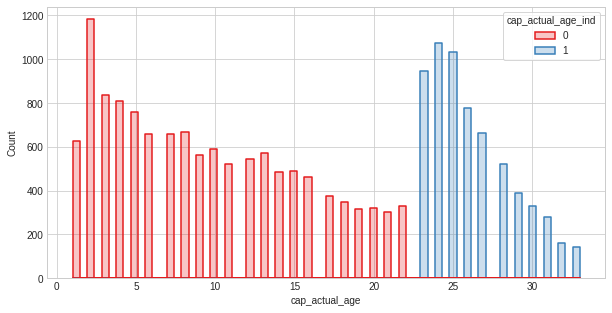

In [178]:
train_df['cap_actual_age_ind'] = (train_df['cap_actual_age'] >= 23).astype(int)
_ = sns.histplot(data=train_df, x='cap_actual_age', hue='cap_actual_age_ind', element='step', linewidth=1.5, bins=70)
train_df.drop('cap_actual_age_ind', axis=1, inplace=True)

В целом, нормально. Однако здесь есть отчетливое разделение на бины.

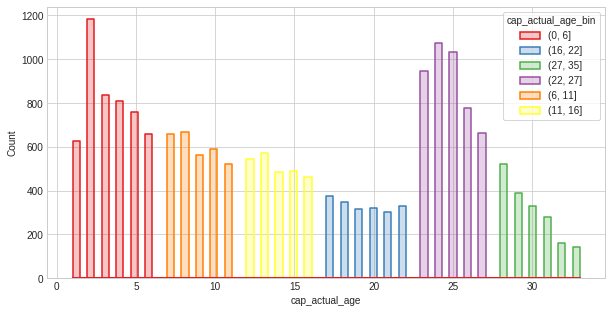

In [179]:
cap_bins = [0, 6, 11, 16, 22, 27, 35]
train_df['cap_actual_age_bin'] = pd.cut(train_df['cap_actual_age'], bins=cap_bins).astype(object)
_ = sns.histplot(data=train_df, x='cap_actual_age', hue='cap_actual_age_bin', element='step', linewidth=1.5, bins=70)

Вот такой признак уже выглядит очень даже неплохо.

Разберемся с остальными признаками. Здесь тоже хорошо бы провести биннинг.

**bus_age**

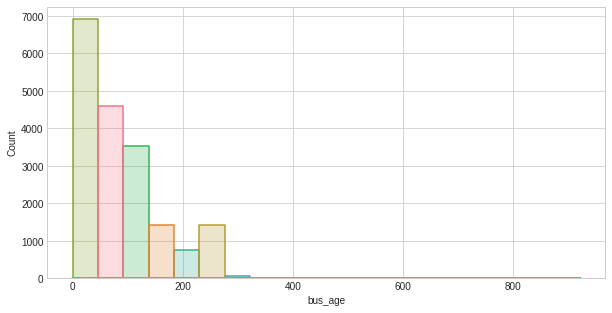

In [180]:
train_df['bus_age_bin'] = pd.cut(train_df['bus_age'], bins=20).astype(object)
_ = sns.histplot(data=train_df, x='bus_age', hue='bus_age_bin', element='step', linewidth=1.5, bins=20)
_ = _.legend([],[], frameon=False)

In [181]:
vc = train_df['bus_age_bin'].value_counts()
vc

(-0.921, 46.05]    6906
(46.05, 92.1]      4590
(92.1, 138.15]     3540
(138.15, 184.2]    1431
(230.25, 276.3]    1421
(184.2, 230.25]     745
(276.3, 322.35]      68
(460.5, 506.55]       3
(506.55, 552.6]       2
(322.35, 368.4]       1
(874.95, 921.0]       1
Name: bus_age_bin, dtype: int64

In [182]:
min_, max_ = 322.35, 921.0
bins = vc[vc > 3].index.tolist() + [pd.Interval(min_, max_, closed='right')]
bins = pd.IntervalIndex(bins)

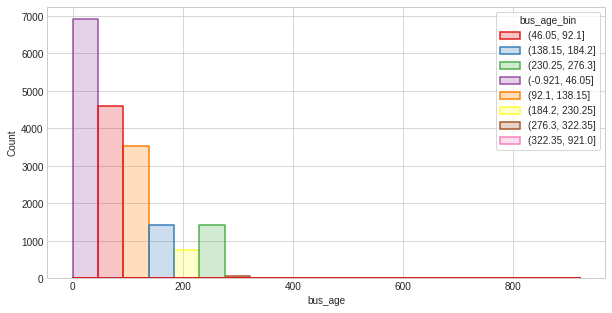

In [183]:
train_df['bus_age_bin'] = pd.cut(train_df['bus_age'], bins=bins).astype(object)
_ = sns.histplot(data=train_df, x='bus_age', hue='bus_age_bin', element='step', linewidth=1.5, bins=20)

**ogrn_age**

В целом, можно обойтись без разбиения этого признака, но все же мне кажется, что категоризация здесь может помочь. Хорошо выглядит разбиение по 10 или 15 лет. В таком случае этот признак может считаться порядковым.

In [184]:
bins = np.arange(0, 151, 15)
bins

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150])

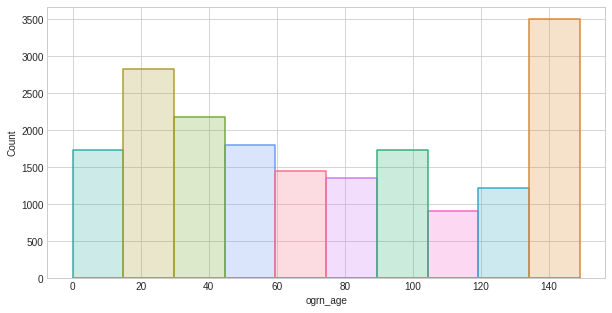

In [185]:
train_df['ogrn_age_bin'] = pd.cut(train_df['ogrn_age'], bins=bins,
                                  include_lowest=True, right=False).astype(object)
_ = sns.histplot(data=train_df, x='ogrn_age', hue='ogrn_age_bin', element='step', linewidth=1.5, bins=len(bins) - 1)
_ = _.legend([],[], frameon=False)

Итак, итог по биннингу:

* `ul_founders_cnt_bin`: ранговый, лучше использовать вместе с оригинальным признаком, но можно и удалить оба
* `cap_actual_age_bin`: ранговый, можно использовать отдельно
* `bus_age_bin`: ранговый, можно использовать отдельно
* `ogrn_age_bin`: ранговый, можно использовать отдельно

In [186]:
FEATURES['rank'] += ['cap_actual_age_bin', 'bus_age_bin', 'ogrn_age_bin']
FEATURES['bad'] = FEATURES['bad'] | set(['ul_systematizing_flg', 'ul_strategic_flg'])

to_drop = set(train_df.columns) & FEATURES['bad']
train_df.drop(to_drop, axis=1, inplace=True)
FEATURES['bad'] = list(FEATURES['bad'])

Итого, по признакам такая ситуация:

In [187]:
FEATURES

{'to_log': ['ar_revenue',
  'ab_other_current_assets',
  'ab_short_term_borrowing',
  'ar_selling_expenses',
  'ab_borrowed_capital',
  'ar_management_expenses',
  'ar_other_profit_and_losses',
  'ab_accounts_payable',
  'ab_long_term_liabilities',
  'ab_immobilized_assets',
  'ab_other_borrowings'],
 'other': ['ar_profit_before_tax',
  'ar_taxes',
  'ar_net_profit',
  'ab_losses',
  'ar_balance_of_rvns_and_expns',
  'ul_capital_sum'],
 'bad': ['ul_systematizing_flg',
  'ab_cash_and_securities',
  'ar_sale_cost',
  'ar_total_expenses',
  'ab_accounts_receivable',
  'head_actual_age',
  'ab_inventory',
  'ab_mobile_current_assets',
  'adr_actual_age',
  'ab_own_capital',
  'ul_branch_cnt',
  'ar_sale_profit',
  'ul_strategic_flg'],
 'rank': ['ul_staff_range',
  'ul_founders_cnt_bin',
  'cap_actual_age_bin',
  'bus_age_bin',
  'ogrn_age_bin'],
 'numeric': ['cap_actual_age', 'ul_founders_cnt', 'ogrn_age', 'bus_age']}

### Итоговые трансформации 

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

class BaseTransformer(BaseEstimator, TransformerMixin):
    '''
        Process nan, outliers, drop bad features
    '''
    def __init__(self, bad_features, outliers=True, q_low=0.02, q_high=0.98):
        super().__init__()
        self.imputer = SimpleImputer(strategy='most_frequent')
        self.bad = bad_features
        self.outliers = outliers
        self.q_low = q_low
        self.q_high = q_high

    def fit(self, data):
        self.floats = data.select_dtypes(include=float).columns
        self.imputer = self.imputer.fit(data[self.floats])
        return self

    def transform(self, data, is_test=True):
        '''
            If is_test then no outliers processing
        '''
        df = data.copy()
        df[self.floats] = self.imputer.transform(df[self.floats])

        if self.outliers and not is_test:
            self.quantiles = {}
            for colname in self.floats:
                self.quantiles[colname] = (
                    df[colname].quantile(self.q_high), df[colname].quantile(self.q_low)
                )

            for colname in self.floats:
                q_98, q_2 = self.quantiles[colname]
                df = df[df[colname] <= q_98]
                df = df[df[colname] >= q_2]
        df.drop(self.bad, axis=1, inplace=True)
        return df


class FloatTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, to_log, other, min_vals):
        self.to_log = to_log
        self.other = other
        self.min_vals = min_vals

    def fit(self, data):
        return self
    
    def transform(self, data):       
        df = data.copy()

        def log_someway(colname):
            min_val = self.min_vals[colname]
            if min_val < 0.0:
                abs_min = np.abs(min_val)
                df['log_' + colname] = np.log((df[colname] + abs_min + 1) / abs_min)
            else:
                df['log1p_' + colname] = np.log1p(df[colname])
            df.drop(colname, axis=1, inplace=True)
            return None

        for colname in self.to_log:
            log_someway(colname)

        return df


class BinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop=None, to_bin=None):
        super().__init__()
        self.drop = drop
        if to_bin is None:
            self.to_bin = ['ul_founders_cnt', 'cap_actual_age', 'bus_age', 'ogrn_age']
        else:
            self.to_bin = self.to_bin
        
    def fit(self, data):
        self.bins_dict = {}

        min_, max_ = 0, 1000
        n_bins = 10
        step = (max_ - min_) / 10
        self.bins_dict['ul_founders_cnt'] = np.arange(min_, max_ + step, step)
        self.bins_dict['cap_actual_age'] = [0, 6, 11, 16, 22, 27, 35]

        vc = pd.cut(data['bus_age'], bins=20).value_counts()
        min_, max_ = 322.35, 921.0
        bins = vc[vc > 3].index.tolist() + [pd.Interval(min_, max_, closed='right')]
        self.bins_dict['bus_age'] = pd.IntervalIndex(bins)

        self.bins_dict['ogrn_age'] = np.arange(0, 151, 15)
        return self
        
    def transform(self, data):       
        df = data.copy()
        for col in self.to_bin:
            if col == 'ogrn_age':
                df[col + '_bin'] = pd.cut(df[col], bins=self.bins_dict[col],
                                          include_lowest=True, right=False).astype(object)
            else:
                df[col + '_bin'] = pd.cut(df[col], bins=self.bins_dict[col]).astype(object)

        if self.drop is not None:
            df.drop(self.drop, axis=1, inplace=True)

        return df


class DataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features, min_vals, outliers=False, drop=None, to_bin=None):
        self.base_tr = BaseTransformer(features['bad'], outliers=outliers)
        self.floats_tr = FloatTransformer(features['to_log'], features['other'], min_vals)
        self.bin_tr = BinTransformer(drop, to_bin)
        
    def fit(self, data):
        self.base_tr = self.base_tr.fit(data)
        self.floats_tr = self.floats_tr.fit(data)
        self.bin_tr = self.bin_tr.fit(data)
        return self
        
    def transform(self, data, is_test=True):     
        df = data.copy()
        df = self.base_tr.transform(df, is_test)
        df = df.drop(columns=['record_id'])
        df = self.floats_tr.transform(df)
        df = self.bin_tr.transform(df)
        return df

## Обработка данных

In [189]:
df_train = pd.read_csv('PD-data-train.csv', sep=';')
df_test = pd.read_csv('PD-data-test.csv', sep=';')
df_train, df_valid = train_test_split(df_train, stratify=df_train.default_12m, test_size=0.3, random_state=42)
valid_ = df_valid.copy()

#### Кодирование и преобразование признаков

In [190]:
dt = DataTransformer(FEATURES, MIN_VALUES).fit(df_train)
X_train = dt.transform(df_train, is_test=False)

In [191]:
def compare(col_1, col_2=None):
    if col_2 is None:
        col_2 = col_1
    print(col_1)
    assert (X_train[col_1] == train_df[col_2]).sum() == X_train.shape[0]

# for i, col in enumerate(X_train.columns):
#     compare(col, col.replace('log1p_', '').replace('log_', ''))

In [192]:
X_valid = dt.transform(df_valid)
X_test = dt.transform(df_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [193]:
y_train, y_valid = X_train.default_12m, X_valid.default_12m
X_train.drop('default_12m', axis=1, inplace=True)
X_valid.drop('default_12m', axis=1, inplace=True)

Где-то встретился NaN.

In [194]:
X_valid.isna().sum()

ar_balance_of_rvns_and_expns      0
ar_profit_before_tax              0
ar_taxes                          0
ar_net_profit                     0
ab_losses                         0
bus_age                           0
ogrn_age                          0
cap_actual_age                    0
ul_staff_range                    0
ul_capital_sum                    0
ul_founders_cnt                   0
log1p_ar_revenue                  0
log_ab_other_current_assets       0
log_ab_short_term_borrowing       0
log_ar_selling_expenses           1
log1p_ab_borrowed_capital         0
log_ar_management_expenses        0
log_ar_other_profit_and_losses    0
log1p_ab_accounts_payable         0
log_ab_long_term_liabilities      2
log1p_ab_immobilized_assets       0
log_ab_other_borrowings           0
ul_founders_cnt_bin               0
cap_actual_age_bin                0
bus_age_bin                       0
ogrn_age_bin                      0
dtype: int64

In [195]:
X_test.isna().sum()

ar_balance_of_rvns_and_expns      0
ar_profit_before_tax              0
ar_taxes                          0
ar_net_profit                     0
ab_losses                         0
bus_age                           0
ogrn_age                          0
cap_actual_age                    0
ul_staff_range                    0
ul_capital_sum                    0
ul_founders_cnt                   0
log1p_ar_revenue                  0
log_ab_other_current_assets       0
log_ab_short_term_borrowing       0
log_ar_selling_expenses           0
log1p_ab_borrowed_capital         0
log_ar_management_expenses        0
log_ar_other_profit_and_losses    0
log1p_ab_accounts_payable         0
log_ab_long_term_liabilities      0
log1p_ab_immobilized_assets       0
log_ab_other_borrowings           0
ul_founders_cnt_bin               0
cap_actual_age_bin                0
bus_age_bin                       0
ogrn_age_bin                      0
dtype: int64

Вероятнее всего, это произошло из-за выбросов: некоторые значения оказались меньше минимума на обучающей выборке, и логарифмирование здесь не работает.

In [196]:
X_valid[X_valid.isna().any(axis=1)][['log_ab_long_term_liabilities', 'log_ar_selling_expenses']]

,log_ab_long_term_liabilities,log_ar_selling_expenses
17395,NaN,7.111869e-08
14249,NaN,7.111869e-08
25568,3.855281,NaN


In [197]:
na_cols = ['ab_long_term_liabilities', 'ar_selling_expenses']
valid_.loc[[17395, 14249, 25568]][na_cols]

,ab_long_term_liabilities,ar_selling_expenses
17395,-3068000.0,0.0
14249,-3068000.0,0.0
25568,30011000.0,-35429000.0


In [198]:
MIN_VALUES[na_cols[0]], MIN_VALUES[na_cols[1]]

(-649000.0, -14061000.0)

In [199]:
valid_[na_cols].min()

ab_long_term_liabilities    -3068000.0
ar_selling_expenses        -35429000.0
dtype: float64

Стоит, вероятно, выкинуть такие значения: если всего по одному `NaN`, то скорее всего это выбросы. Вместо удаление можно сделать преобразования: заменив эти экстремальные значения на преопределенный минимум, тем эти `NaN`-ы под логарифмом переведутся в нули.

Конечно, это костыль, но отказываться от логарифмирования здесь не очень хочется.

In [200]:
mode = X_valid['log_ar_selling_expenses'].mode()[0]

In [201]:
X_valid['log_ab_long_term_liabilities'].fillna(0, inplace=True)
X_valid['log_ar_selling_expenses'].fillna(mode, inplace=True)
X_valid['log_ar_selling_expenses'].replace(mode, 0, inplace=True)

Теперь нужно определить, как кодировать категориальные признаки, которые в этом задании по сути ранговые -- полученные из числовых признаков путем разделения шкалы на отрезки. Здесь в целом можно просто перевести признаки в ранги а-ля `OrdinalEncoder`.

Но в этот раз я хочу попробовать другой метод -- `Weight of Evidence`. Он кодирует метку в величину по ее степени влияния на таргет, и это может быть актуально для нашей задачи.

Аналогично, можно попробовать и `Mean Target`, однако здесь мы вряд ли получим хорошие результаты, потому что очень много редковстречаемых категорий, при кодировании которых получим некорректные средние значения таргета

Например, если у нас выборка из автомобилей девяностых-двухтысячных годов, и в ней встречаются несколько автомобилей с 70-х годов, которые являются раритетными и дорогими. Тогда алгоритм будет считать, что автомобили 70-х годов - дорогие, что не всегда так.

Здесь важно сильное сглаживание счетчиков, однако вероятнее всего сильно потеряем в качестве.

Можно еще использовать энкодер, который встроен в `CatBoost` -- тоже `Mean Target`, но какой-то более хитрый.

In [202]:
FEATURES['log1p'], FEATURES['log'] = [], []
for col in X_train.columns:
    if 'log1p_' in col:
        FEATURES['log1p'] += [col]
    elif 'log_' in col:
        FEATURES['log'] += [col]

In [203]:
pip install -q category_encoders

In [204]:
from category_encoders.woe import WOEEncoder
from category_encoders.target_encoder import TargetEncoder
from category_encoders.cat_boost import CatBoostEncoder

class ColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features_dict, encoder_type='woe', **encoder_kwargs):
        self.rank = features_dict['rank']
        self.numeric = features_dict['log'] + features_dict['log1p'] + features_dict['other'] + features_dict['numeric']
        self.encoder_type = encoder_type
        self.encoder_kwargs = encoder_kwargs
        
    def fit(self, data, y):
        if self.encoder_type == 'woe':
            self.encoder = WOEEncoder(cols=self.rank, random_state=42, **self.encoder_kwargs).fit(data, y)
        elif self.encoder_type == 'mean':
            self.encoder = TargetEncoder(cols=self.rank, **self.encoder_kwargs).fit(data, y)
        else:
            self.encoder = CatBoostEncoder(cols=self.rank, random_state=42, **self.encoder_kwargs).fit(data, y)

        self.scaler = StandardScaler().fit(data[self.numeric])
        return self
        
    def transform(self, data):     
        df = data.copy()  
        df = self.encoder.transform(df)
        df[self.numeric] = self.scaler.transform(df[self.numeric])
        return df

In [205]:
coltr = ColumnsTransformer(FEATURES).fit(X_train, y_train)
X_train = coltr.transform(X_train)
X_valid = coltr.transform(X_valid)
X_test = coltr.transform(X_test)

Хочу посмотреть на визуализацию данных.

In [206]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.manifold import TSNE

tsne_kwargs = {
    'metric': 'cosine',
    'learning_rate': 'auto',
    'min_grad_norm': 1e-8,
    'random_state': 42,
    'init': 'pca',
    'perplexity': 20,
    'n_iter': 700,
    'n_iter_without_progress': 100,
}

tsne = TSNE(**tsne_kwargs, n_jobs=-1)
train_tsne = tsne.fit_transform(X_train, y_train)
valid_tsne = tsne.fit_transform(X_valid, y_valid)

In [207]:
def plot_tsne(data_tsne: dict, labels: dict):
    fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
    for i, name in enumerate(data_tsne):
        X = data_tsne[name]
        y = np.asarray(labels[name])

        neg_inds = np.argwhere(y == 0).reshape(-1)
        pos_inds = np.argwhere(y == 1).reshape(-1)
        axes[i].scatter(X[neg_inds, 0], X[neg_inds, 1], color='royalblue', label='0')
        axes[i].scatter(X[pos_inds, 0], X[pos_inds, 1], color='lime', label='1')

        axes[i].set_title(name, fontsize=15)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

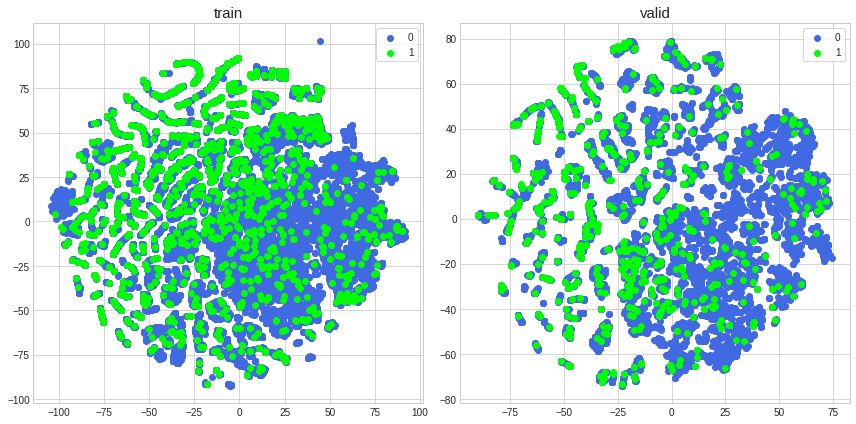

In [208]:
data_tsne = {'train': train_tsne, 'valid': valid_tsne}
labels = {'train': y_train, 'valid': y_valid}
plot_tsne(data_tsne, labels)

Что ж, я пробовал бустинг, случайный лес, изоляционный лес, но все это бесполезно: эти модели не могут обобщать. Судя по визуализации, здесь имеет смысл либо ядровой SVM, либо пытаться что-то делать через обучение метрик. В целом, это понятно даже из распределений: уж слишком они близки. Если кратко, нужно выводить признаки либо в нелинейное пространство, либо же как-то хитро считать расстояние между ними.